In [1]:
%pip install pyspark py4j -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('PySpark_for_DataScience').getOrCreate()

In [6]:
df = spark.read.csv('/content/drive/MyDrive/Pyspark/spotify_weekly_chart.csv', sep = ',',header = True,)

df.printSchema()

root
 |-- Pos: string (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: string (nullable = true)
 |-- Pk: string (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: string (nullable = true)
 |-- Streams+: string (nullable = true)
 |-- Total: string (nullable = true)



In [7]:
from pyspark.sql.types import *

data_schema = [
               StructField('Pos', IntegerType(), True),
               StructField('P+', StringType(), True),
               StructField('Artist', StringType(), True),
               StructField('Title', StringType(), True),
               StructField('Wks', IntegerType(), True),
               StructField('Pk', IntegerType(), True),
               StructField('(x?)', StringType(), True),
               StructField('Streams', IntegerType(), True),
               StructField('Streams+', DoubleType(), True),
               StructField('Total', IntegerType(), True),
            ]

final_struc = StructType(fields = data_schema)

In [9]:
df = spark.read.csv(
    '/content/drive/MyDrive/Pyspark/spotify_weekly_chart.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

df.printSchema()

root
 |-- Pos: integer (nullable = true)
 |-- P+: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Wks: integer (nullable = true)
 |-- Pk: integer (nullable = true)
 |-- (x?): string (nullable = true)
 |-- Streams: integer (nullable = true)
 |-- Streams+: double (nullable = true)
 |-- Total: integer (nullable = true)



In [10]:
df.limit(5).toPandas()

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,Miley Cyrus,Flowers,7,1,7,56744018,-5019054.0,585390148
1,2,NEW,KAROL G,TQG,1,2,1,53284451,NaN,53284451
2,3,NEW,The Weeknd,Die For You,1,3,1,46213370,NaN,46213370
3,4,-2,SZA,Kill Bill,12,1,2,45630547,-918530.0,556085332
4,5,-2,PinkPantheress,Boy's a liar Pt. 2,4,3,1,39475419,303113.0,123300074


In [11]:
df.describe().show()

+-------+------------------+------------------+-----------+------+-----------------+----------------+-----------------+-----------------+------------------+--------------------+
|summary|               Pos|                P+|     Artist| Title|              Wks|              Pk|             (x?)|          Streams|          Streams+|               Total|
+-------+------------------+------------------+-----------+------+-----------------+----------------+-----------------+-----------------+------------------+--------------------+
|  count|               200|               200|        200|   200|              200|             200|               32|              200|               184|                 192|
|   mean|             100.5|-2.536723163841808|       null| 505.0|            44.32|           44.43|          4.34375|    1.234558693E7| 98076.73369565218| 3.857726347291667E8|
| stddev|57.879184513951124|24.042577206838494|       null|  null|62.79781387226534|45.8743652483026|4.0529509

In [12]:
df.count()

200

In [13]:
df = df.withColumnRenamed('Pos', 'Rank')

df.show(5)

+----+---+---------------+------------------+---+---+----+--------+----------+---------+
|Rank| P+|         Artist|             Title|Wks| Pk|(x?)| Streams|  Streams+|    Total|
+----+---+---------------+------------------+---+---+----+--------+----------+---------+
|   1|  =|   Miley Cyrus |           Flowers|  7|  1|   7|56744018|-5019054.0|585390148|
|   2|NEW|       KAROL G |               TQG|  1|  2|   1|53284451|      null| 53284451|
|   3|NEW|    The Weeknd |       Die For You|  1|  3|   1|46213370|      null| 46213370|
|   4| -2|           SZA |         Kill Bill| 12|  1|   2|45630547| -918530.0|556085332|
|   5| -2|PinkPantheress |Boy's a liar Pt. 2|  4|  3|   1|39475419|  303113.0|123300074|
+----+---+---------------+------------------+---+---+----+--------+----------+---------+
only showing top 5 rows



In [14]:
df = df.drop('P+','Pk','(x?)','Streams+')

df.show(5)

+----+---------------+------------------+---+--------+---------+
|Rank|         Artist|             Title|Wks| Streams|    Total|
+----+---------------+------------------+---+--------+---------+
|   1|   Miley Cyrus |           Flowers|  7|56744018|585390148|
|   2|       KAROL G |               TQG|  1|53284451| 53284451|
|   3|    The Weeknd |       Die For You|  1|46213370| 46213370|
|   4|           SZA |         Kill Bill| 12|45630547|556085332|
|   5|PinkPantheress |Boy's a liar Pt. 2|  4|39475419|123300074|
+----+---------------+------------------+---+--------+---------+
only showing top 5 rows



In [15]:
df = df.na.drop()
## Or
#data.na.replace(old_value, new_vallue)

In [16]:
df.select(['Artist', 'Artist', 'Total']).show(5)

+---------------+---------------+---------+
|         Artist|         Artist|    Total|
+---------------+---------------+---------+
|   Miley Cyrus |   Miley Cyrus |585390148|
|       KAROL G |       KAROL G | 53284451|
|    The Weeknd |    The Weeknd | 46213370|
|           SZA |           SZA |556085332|
|PinkPantheress |PinkPantheress |123300074|
+---------------+---------------+---------+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import col, lit, when

df.filter(
    (col("Total") >= lit("600000000")) & (col("Total") <= lit("700000000"))
).show(5)

+----+-------------+-------------------+---+--------+---------+
|Rank|       Artist|              Title|Wks| Streams|    Total|
+----+-------------+-------------------+---+--------+---------+
|  14|  The Weeknd |        Die For You| 59|22988828|687729855|
|  18|Taylor Swift |               Anti| 19|20034882|619942698|
|  46| Chris Brown |Under The Influence| 32|14024690|604561746|
|  67|  Steve Lacy |          Bad Habit| 34|12146050|616610588|
|  92|     ROSALÍA |           DESPECHÁ| 31|10134064|604837151|
+----+-------------+-------------------+---+--------+---------+
only showing top 5 rows



In [18]:
df.select('Artist', 'Title', 
            when(df.Wks >= 35, 1).otherwise(0)
           ).show(5)

+---------------+------------------+---------------------------------------+
|         Artist|             Title|CASE WHEN (Wks >= 35) THEN 1 ELSE 0 END|
+---------------+------------------+---------------------------------------+
|   Miley Cyrus |           Flowers|                                      0|
|       KAROL G |               TQG|                                      0|
|    The Weeknd |       Die For You|                                      0|
|           SZA |         Kill Bill|                                      0|
|PinkPantheress |Boy's a liar Pt. 2|                                      0|
+---------------+------------------+---------------------------------------+
only showing top 5 rows



In [19]:
df.select(['Artist','Wks','Total'])\
        .groupBy('Artist')\
        .mean()\
        .orderBy(['avg(Total)'], ascending = [False])\
        .show(5)

+------------------+--------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|
+------------------+--------+--------------------+
|    Billie Eilish |   254.0|       2.098789064E9|
|     James Arthur |   290.0|       1.983256195E9|
|     Harry Styles |    87.0|1.5457005193333333E9|
|The Neighbourhood |   156.0|       1.440976493E9|
|       Elton John |    81.0|       1.388794442E9|
+------------------+--------+--------------------+
only showing top 5 rows



<Axes: xlabel='Artist', ylabel='Average Average Streams'>

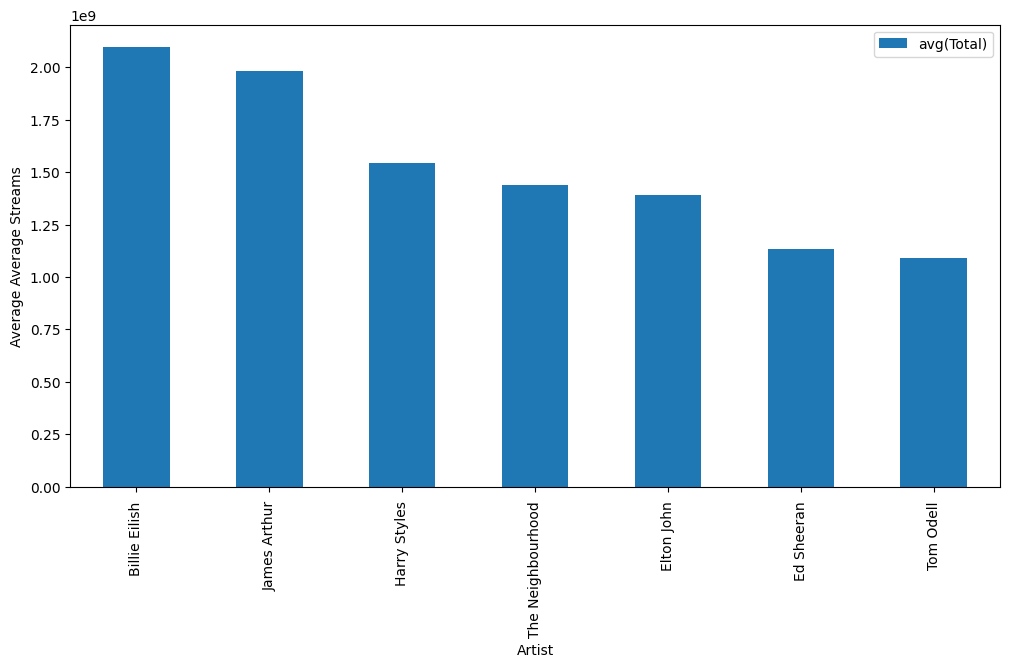

In [20]:
vis_df = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
    .toPandas()
)

vis_df.iloc[0:7].plot(
    kind="bar",
    x="Artist",
    y="avg(Total)",
    figsize=(12, 6),
    ylabel="Average Average Streams",
)

In [21]:
final_data = (
    df.select(["Artist", "Wks", "Total"])
    .groupBy("Artist")
    .mean()
    .orderBy(["avg(Total)"], ascending=[False])
)

# CSV
final_data.write.csv("dataset.csv")

# JSON
final_data.write.save("dataset.json", format="json")

# Parquet
final_data.write.save("dataset.parquet", format="parquet")

In [22]:
from pyspark.ml.feature import (
    VectorAssembler,
    StringIndexer,
    OneHotEncoder,
    StandardScaler,
)

## Categorical Encoding
indexer = StringIndexer(inputCol="Artist", outputCol="Encode_Artist").fit(
    final_data
)
encoded_df = indexer.transform(final_data)

## Assembling Features
assemble = VectorAssembler(
    inputCols=["Encode_Artist", "avg(Wks)", "avg(Total)"],
    outputCol="features",
)

assembled_data = assemble.transform(encoded_df)

## Standard Scaling
scale = StandardScaler(inputCol="features", outputCol="standardized")
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(5)

+------------------+--------+--------------------+-------------+--------------------+--------------------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|        standardized|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|[8.0,254.0,2.0987...|[0.22082097898955...|
|     James Arthur |   290.0|       1.983256195E9|         42.0|[42.0,290.0,1.983...|[1.15931013969515...|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|[34.0,87.0,1.5457...|[0.93848916070560...|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|[108.0,156.0,1.44...|[2.98108321635897...|
|       Elton John |    81.0|       1.388794442E9|         26.0|[26.0,81.0,1.3887...|[0.71766818171604...|
+------------------+--------+--------------------+-------------+--------------------+--------------------+
only showing top 5 rows



In [23]:
from pyspark.ml.clustering import KMeans
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)
preds=KMeans_fit.transform(data_scale_output)

preds.show(5)

+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|            Artist|avg(Wks)|          avg(Total)|Encode_Artist|            features|        standardized|prediction|
+------------------+--------+--------------------+-------------+--------------------+--------------------+----------+
|    Billie Eilish |   254.0|       2.098789064E9|          8.0|[8.0,254.0,2.0987...|[0.22082097898955...|         1|
|     James Arthur |   290.0|       1.983256195E9|         42.0|[42.0,290.0,1.983...|[1.15931013969515...|         1|
|     Harry Styles |    87.0|1.5457005193333333E9|         34.0|[34.0,87.0,1.5457...|[0.93848916070560...|         3|
|The Neighbourhood |   156.0|       1.440976493E9|        108.0|[108.0,156.0,1.44...|[2.98108321635897...|         1|
|       Elton John |    81.0|       1.388794442E9|         26.0|[26.0,81.0,1.3887...|[0.71766818171604...|         3|
+------------------+--------+--------------------+------

<ipython-input-24-074d404c79fa>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df_viz.groupby(["prediction"], as_index=False).mean()


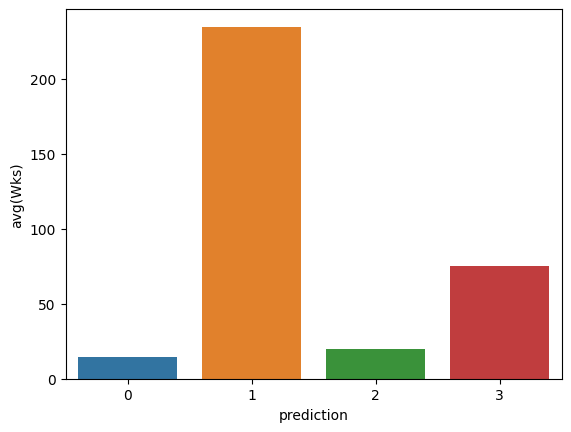

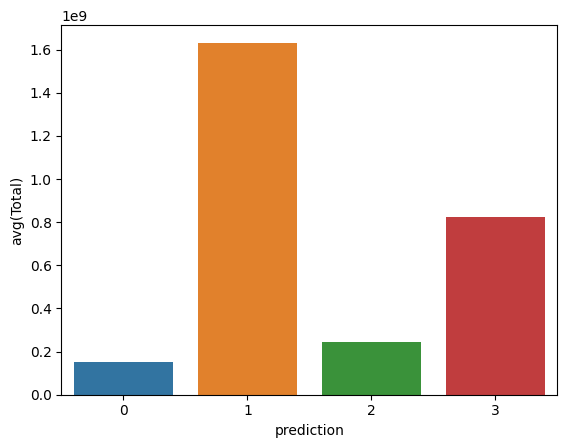

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select(
    "Artist", "avg(Wks)", "avg(Total)", "prediction"
).toPandas()
avg_df = df_viz.groupby(["prediction"], as_index=False).mean()

list1 = ["avg(Wks)", "avg(Total)"]

for i in list1:
    sns.barplot(x="prediction", y=str(i), data=avg_df)
    plt.show()

In [28]:
KMeans_fit.save("KMeans_fit.model")

In [31]:
from pyspark.ml.clustering import KMeansModel
sameModel =KMeansModel.load("KMeans_fit.model")